# Tutorial

In the following we will demonstrate the `epmatools` package. It is currently capable of doing just few impressive things:

In [1]:
from epmatools import *

## Basic usage

We should start with importing some data as oxides in wt%. You can use `Oxides` methods `from_excel()` or `from_clipboard()`, but for now we will use some example data provided:

In [2]:
d = Oxides.from_examples('minerals')
d

,SiO2,Al2O3,MgO,FeO,MnO,CaO,K2O,Na2O,TiO2,Cr2O3,ZnO,P2O5,Y2O3
0,37.218,20.349,13.784,13.140,0.000,0.013,8.998,0.404,1.010,0.022,0.020,0.005,0.007
1,37.363,20.037,14.106,12.539,0.000,0.013,8.946,0.461,1.206,0.020,0.042,0.000,0.000
2,23.748,22.152,9.611,31.549,0.066,0.028,0.023,0.035,0.047,0.000,0.017,0.037,0.000
3,46.986,39.183,0.151,1.264,0.033,0.410,3.409,4.883,0.083,0.000,0.000,0.006,0.000
4,48.389,32.414,8.227,7.713,0.060,0.027,0.000,0.924,0.005,0.009,0.000,0.005,0.000
5,48.870,32.696,8.390,7.482,0.068,0.049,0.000,0.845,0.000,0.000,0.000,0.000,0.000
6,61.839,24.661,0.000,0.484,0.015,5.738,0.032,7.917,0.000,0.010,0.019,0.025,0.000
7,37.816,21.184,4.189,35.118,1.001,1.435,0.000,0.000,0.000,0.000,0.000,0.006,0.000
8,37.584,21.311,4.651,33.895,0.999,1.454,0.000,0.035,0.013,0.034,0.000,0.030,0.107
9,60.657,25.087,0.001,0.000,0.000,5.849,0.106,7.940,0.000,0.000,0.003,0.113,0.000


`Oxides` automatically recognize valid column names for oxides, which are shown by default but other columns are also available. You can check them using property `others`

In [3]:
d.others

,Total,Comment
0,95.467,bt-01
1,95.173,bt-02
2,87.475,chl-04
3,96.458,pa-05
4,97.784,cd-06
5,98.418,cd-07
6,100.740,pl-08
7,100.752,g-09
8,100.124,g-10
9,99.756,pl-22


Those columns could be set as index allowing to select and seach particular data

In [4]:
d = d.set_index('Comment')
d

,SiO2,Al2O3,MgO,FeO,MnO,CaO,K2O,Na2O,TiO2,Cr2O3,ZnO,P2O5,Y2O3
bt-01,37.218,20.349,13.784,13.140,0.000,0.013,8.998,0.404,1.010,0.022,0.020,0.005,0.007
bt-02,37.363,20.037,14.106,12.539,0.000,0.013,8.946,0.461,1.206,0.020,0.042,0.000,0.000
chl-04,23.748,22.152,9.611,31.549,0.066,0.028,0.023,0.035,0.047,0.000,0.017,0.037,0.000
pa-05,46.986,39.183,0.151,1.264,0.033,0.410,3.409,4.883,0.083,0.000,0.000,0.006,0.000
cd-06,48.389,32.414,8.227,7.713,0.060,0.027,0.000,0.924,0.005,0.009,0.000,0.005,0.000
cd-07,48.870,32.696,8.390,7.482,0.068,0.049,0.000,0.845,0.000,0.000,0.000,0.000,0.000
pl-08,61.839,24.661,0.000,0.484,0.015,5.738,0.032,7.917,0.000,0.010,0.019,0.025,0.000
g-09,37.816,21.184,4.189,35.118,1.001,1.435,0.000,0.000,0.000,0.000,0.000,0.006,0.000
g-10,37.584,21.311,4.651,33.895,0.999,1.454,0.000,0.035,0.013,0.034,0.000,0.030,0.107
pl-22,60.657,25.087,0.001,0.000,0.000,5.849,0.106,7.940,0.000,0.000,0.003,0.113,0.000


To select just subset of data, we can use `search()` method. Using string argument, you can search for text in index, using numeric, you can select particular analysis. Note, that index could be modified by `reset_index()` and `set_index()` methods.

In [5]:
g = d.search("g")
g

,SiO2,Al2O3,MgO,FeO,MnO,CaO,K2O,Na2O,TiO2,Cr2O3,ZnO,P2O5,Y2O3
g-09,37.816,21.184,4.189,35.118,1.001,1.435,0.000,0.000,0.000,0.000,0.000,0.006,0.000
g-10,37.584,21.311,4.651,33.895,0.999,1.454,0.000,0.035,0.013,0.034,0.000,0.030,0.107


Analyses could be converted to cations p.f.u, either providing number of oxygens

In [6]:
g.cations(noxy=12)

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+}
g-09,3.0034,1.9829,0.4960,2.3325,0.0673,0.1221,0.0000,0.0000,0.0000,0.0000,0.0000,0.0004,0.0000
g-10,2.9914,1.9991,0.5518,2.2561,0.0673,0.1240,0.0000,0.0054,0.0008,0.0021,0.0000,0.0020,0.0045


or number of cations

In [7]:
g.cations(ncat=8, tocat=True)

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+}
g-09,3.0017,1.9817,0.4957,2.3312,0.0673,0.1220,0.0000,0.0000,0.0000,0.0000,0.0000,0.0004,0.0000
g-10,2.9897,1.9979,0.5515,2.2548,0.0673,0.1239,0.0000,0.0054,0.0008,0.0021,0.0000,0.0020,0.0045


Cations could be also calculated according to mineral structural formula using `Mineral` instance.

In [8]:
grt = mindb.Garnet()
apfu = g.apfu(grt)
apfu

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+},Fe{3+}
g-09,3.0017,1.9817,0.4957,2.3175,0.0673,0.1220,0.0000,0.0000,0.0000,0.0000,0.0000,0.0004,0.0000,0.0137
g-10,2.9897,1.9979,0.5515,2.2409,0.0673,0.1239,0.0000,0.0054,0.0008,0.0021,0.0000,0.0020,0.0045,0.0139


Cations calculated according to mineral structural formula, could be used to calculate endmembers proportios (if defined for given mineral).

In [9]:
apfu.endmembers()

,Alm,Prp,Sps,Grs,Adr,Uv,CaTi
g-09,0.771849,0.165090,0.022414,0.040367,0.000280,0.000000,0.000000
g-10,0.751060,0.184849,0.022558,0.041276,0.000197,0.000044,0.000016


Recalculate plagioclase...

In [10]:
f = d.search("pl-")
f

,SiO2,Al2O3,MgO,FeO,MnO,CaO,K2O,Na2O,TiO2,Cr2O3,ZnO,P2O5,Y2O3
pl-08,61.839,24.661,0.000,0.484,0.015,5.738,0.032,7.917,0.000,0.010,0.019,0.025,0.000
pl-22,60.657,25.087,0.001,0.000,0.000,5.849,0.106,7.940,0.000,0.000,0.003,0.113,0.000
pl-23,61.338,25.025,0.015,0.030,0.003,5.801,0.079,7.997,0.047,0.000,0.057,0.064,0.000


In [11]:
plg = mindb.Feldspar()
apfu = f.apfu(plg)
apfu

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+}
pl-08,2.7240,1.2803,0.0000,0.0178,0.0006,0.2708,0.0018,0.6761,0.0000,0.0003,0.0006,0.0009,0.0000
pl-22,2.6968,1.3145,0.0001,0.0000,0.0000,0.2786,0.0060,0.6844,0.0000,0.0000,0.0001,0.0043,0.0000
pl-23,2.7076,1.3019,0.0010,0.0011,0.0001,0.2744,0.0044,0.6844,0.0016,0.0000,0.0019,0.0024,0.0000


In [12]:
apfu.endmembers()

,An,Ab,Or
pl-08,0.285439,0.712666,0.001895
pl-22,0.287517,0.706279,0.006204
pl-23,0.284836,0.710546,0.004619


You can also find out cations p.f.u. not only from your analysis, but also from site occupancies for given mineral structural formula.

In [13]:
apfu.mineral_apfu()

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+}
pl-08,2.7240,1.2760,0.0000,0.0000,0.0000,0.2708,0.0018,0.6761,0.0000,0.0000,0.0000,0.0000,0.0000
pl-22,2.6968,1.3032,0.0000,0.0000,0.0000,0.2786,0.0060,0.6844,0.0000,0.0000,0.0000,0.0000,0.0000
pl-23,2.7076,1.2924,0.0000,0.0000,0.0000,0.2744,0.0044,0.6844,0.0000,0.0000,0.0000,0.0000,0.0000


The difference between analysis and site occupancies could by accessed by property `reminder`

In [14]:
apfu.reminder

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+}
pl-08,0.0,0.004246,0.000000,0.017830,0.000560,0.0,0.0,0.0,0.000000,0.000348,0.000618,0.000932,0.0
pl-22,0.0,0.011310,0.000066,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000098,0.004253,0.0
pl-23,0.0,0.009496,0.000987,0.001107,0.000112,0.0,0.0,0.0,0.001561,0.000000,0.001858,0.002392,0.0


## Plotting

The module plotting providing some common plots, e.g. garnet profiles. Here is quick example

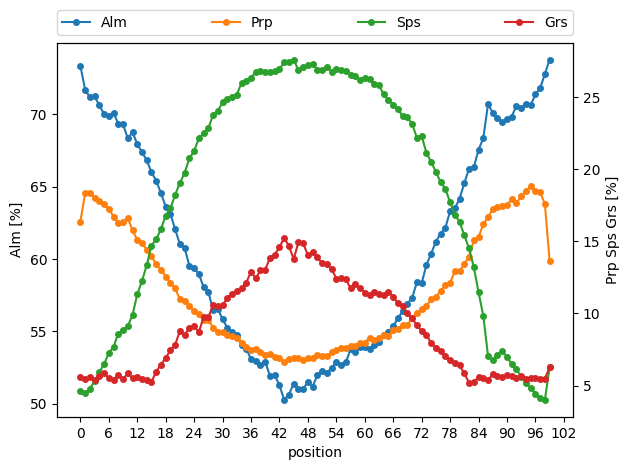

In [15]:
gp = Oxides.from_examples("grt_profile")
em = gp.apfu(grt).endmembers()
minplot.plot_grt_profile(em, percents=True)

## EDS maps

In [16]:
from epmatools.maps import MapStore

In [17]:
h5 = MapStore.from_examples('ex1')
h5.samples

['Demo']

In [18]:
s = h5.get_sample('Demo')

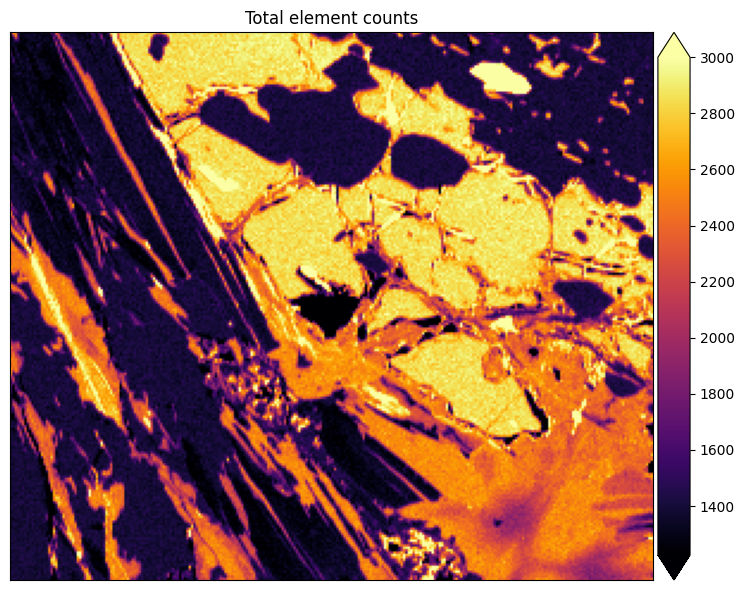

In [19]:
s.show()

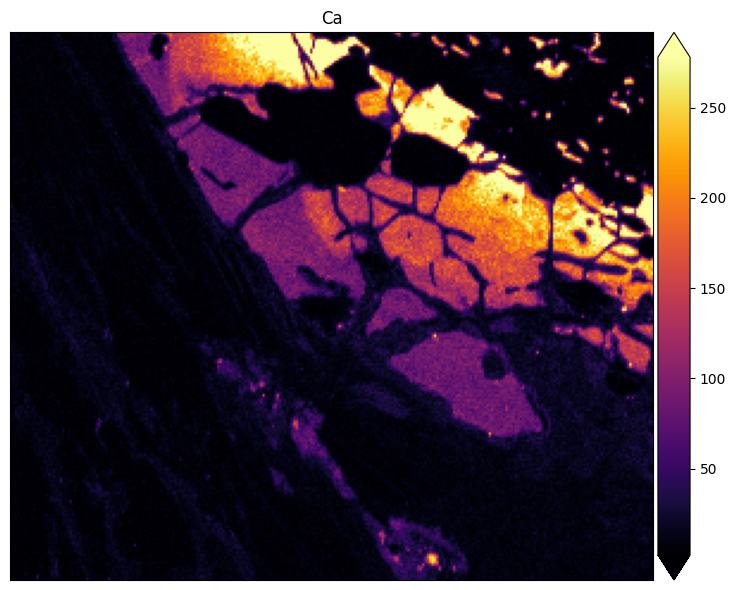

In [20]:
s.show('Ca')

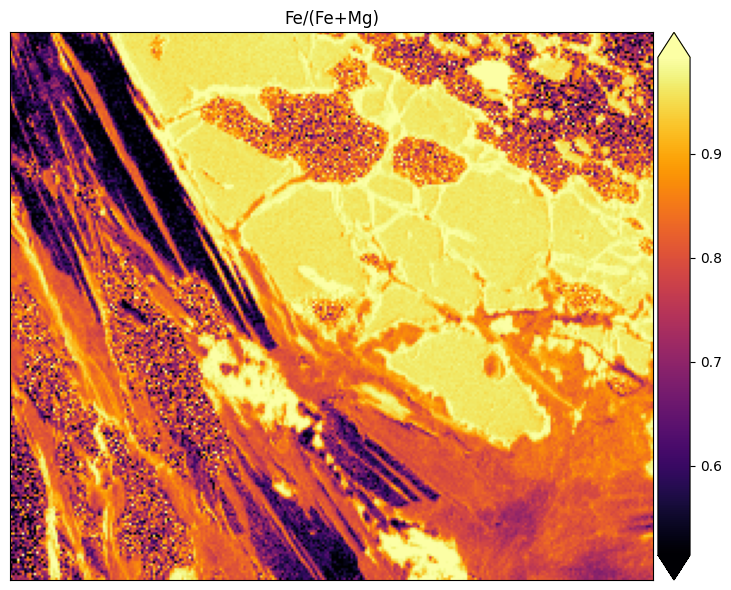

In [21]:
s.show('Fe/(Fe+Mg)')

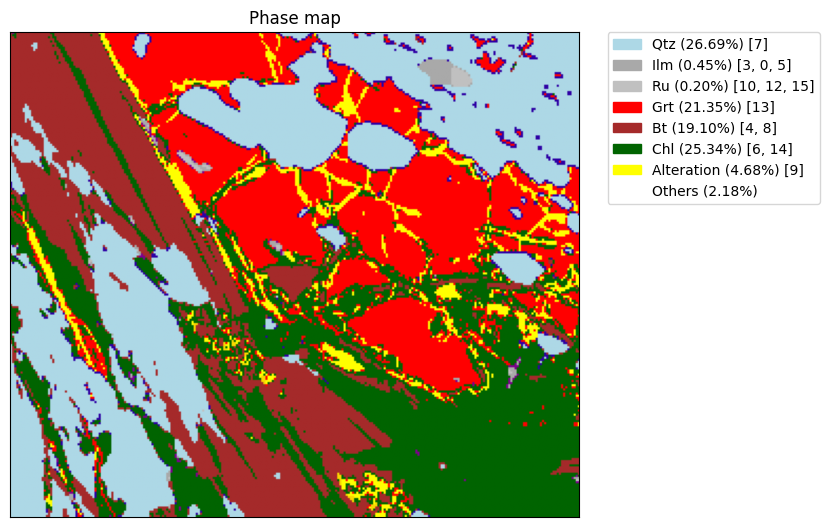

In [22]:
s.phasemap()